**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data**

In [2]:
from google.colab import files
uploaded = files.upload()
customers = pd.read_csv('Customers.csv')

uploaded = files.upload()
products = pd.read_csv('Products.csv')

uploaded = files.upload()
transactions = pd.read_csv('Transactions.csv')

Saving Customers.csv to Customers.csv


Saving Products.csv to Products.csv


Saving Transactions.csv to Transactions.csv


**Preprocessing and Feature Engineering**

In [23]:
# Merge transactions with customer profiles
data = pd.merge(transactions, customers, on='CustomerID')

# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Calculate Recency (days since last transaction)
current_date = pd.Timestamp.now()
data['RecencyDays'] = (current_date - data['TransactionDate']).dt.days

# Aggregate features at the customer level
customer_features = data.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count'),
    RecencyDays=('RecencyDays', 'min'),
).reset_index()

# Display aggregated features
print(customer_features.head())

  CustomerID  TotalSpend  TransactionCount  RecencyDays
0      C0001     3354.52                 5           86
1      C0002     1862.74                 4           55
2      C0003     2725.38                 4          155
3      C0004     5354.88                 8           35
4      C0005     2034.24                 3           84


**Normalize Features**

In [24]:
# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpend', 'TransactionCount', 'RecencyDays']])

# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['TotalSpend', 'TransactionCount', 'RecencyDays'])

**Apply Clustering**

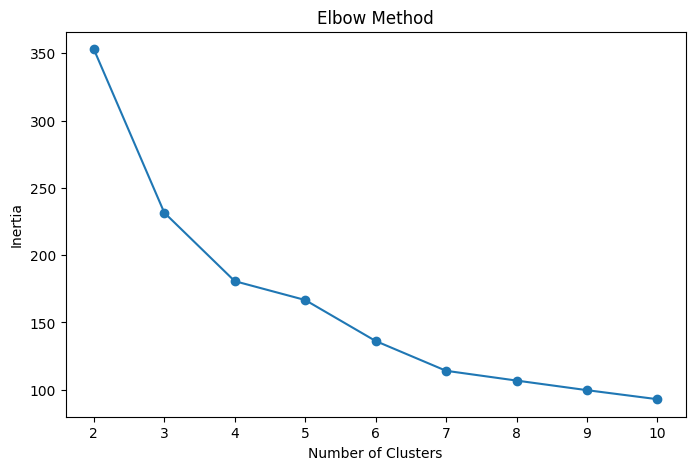

In [25]:
# Elbow method to find optimal k
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**Apply kmeans**

In [26]:
# Apply K-Means with the chosen number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_df)

**Evalute Clustering**

In [27]:
# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_df, customer_features['Cluster'])
silhouette_avg = silhouette_score(scaled_df, customer_features['Cluster'])

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.999481284655581
Silhouette Score: 0.3214289491428424


**Visualize Clusters**

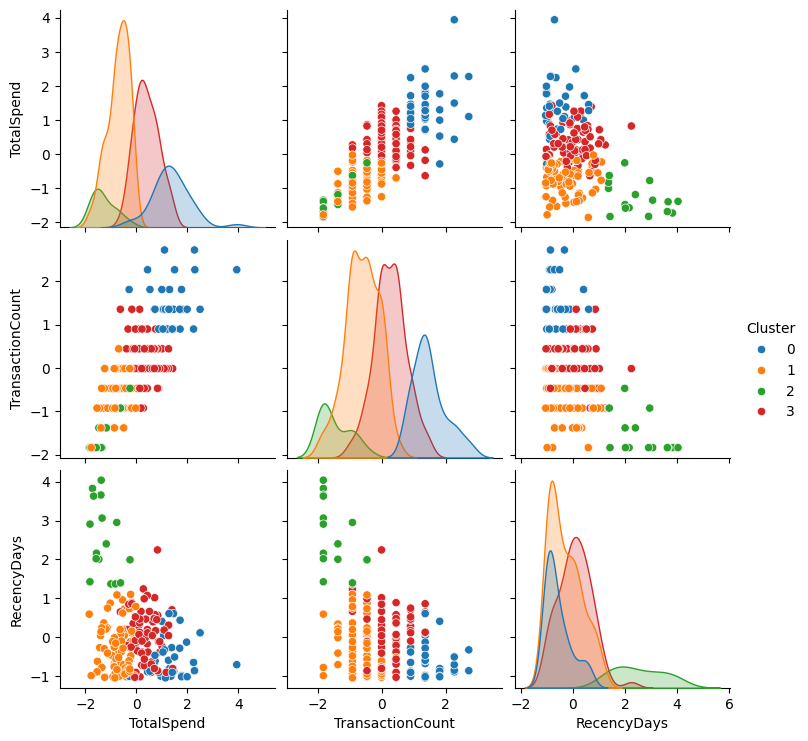

In [28]:
# Visualize clusters
sns.pairplot(
    pd.concat([scaled_df, customer_features['Cluster']], axis=1),
    hue='Cluster', palette='tab10'
)
plt.show()

In [32]:
from google.colab import files
customer_features.to_csv('Goddati_Bhavyasri_Clustering.csv', encoding = 'utf-8-sig')
files.download('Goddati_Bhavyasri_Clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>